# **`Salifort Motors Employee Retention Project`**

### **Project Overview**

`Objective:`
- To provide data-driven insights and predictive modeling to help the HR department identify factors that contribute to employee attrition, and to predict which employees are most likely to leave the company.

`Goal:`
- Reduce attrition by identifying at-risk employees and offering targeted interventions.


### **Salifort Motors Dataset Information**

The dataset in this project contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

In [1]:
#importing packages
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

import scipy
from scipy import stats

import statsmodels.api as sms
import statsmodels.formula.api
from statsmodels.formula.api import ols
from statsmodels.formula.api import logit

# Packages for logistic regression and confusion matrix
import sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, \
confusion_matrix, ConfusionMatrixDisplay

## **`PLAN PHASE`**

**Data Filtering**

**Data Manipulations**

In [2]:
df = pd.read_csv(r"C:\Users\USER\Documents\Data Science Repositories\Salifort Motors Project Lab\HR_dataset.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [3]:
df.shape

(14999, 10)

In [4]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years', 'department', 'salary', 'left'],
      dtype='object')

In [5]:
df= df.rename(columns={'time_spend_company':'tenure', 'left':'status'})

In [6]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident',
       'promotion_last_5years', 'department', 'salary', 'status'],
      dtype='object')

In [7]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,status
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
promotion_last_5years    0
department               0
salary                   0
status                   0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(3008)

In [10]:
df[df.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,department,salary,status
396,0.46,0.57,2,139,3,0,0,sales,low,1
866,0.41,0.46,2,128,3,0,0,accounting,low,1
1317,0.37,0.51,2,127,3,0,0,sales,medium,1
1368,0.41,0.52,2,132,3,0,0,RandD,low,1
1461,0.42,0.53,2,142,3,0,0,sales,low,1


`Takeway`

>From the inspection above it is very unlikely that across 10 columns, over 3000 employees have got the same values. 

>Droping the duplicated values is feasible

In [11]:
df0 =df.drop_duplicates(keep='first')
df0.duplicated().sum()

np.int64(0)

In [12]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   promotion_last_5years  11991 non-null  int64  
 7   department             11991 non-null  object 
 8   salary                 11991 non-null  object 
 9   status                 11991 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


#### **Checking Outliers**

Text(0.5, 1.0, 'Boxplot of Number of Project')

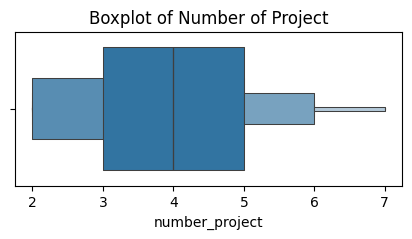

In [13]:
plt.figure(figsize=(5,2))
sns.boxenplot(data=df0, x='number_project')
plt.title('Boxplot of Number of Project')

Text(0.5, 1.0, 'Boxplot of Employee Tenure')

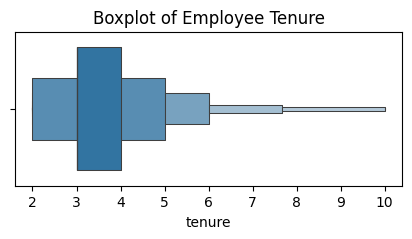

In [14]:
plt.figure(figsize=(5,2))
sns.boxenplot(data=df0, x='tenure')
plt.title('Boxplot of Employee Tenure')

`Takeaways`

The boxplot above shows that there are outliers in the `tenure` variable. 

Text(0.5, 1.0, 'Boxplot of Employee Average Monthly Hours')

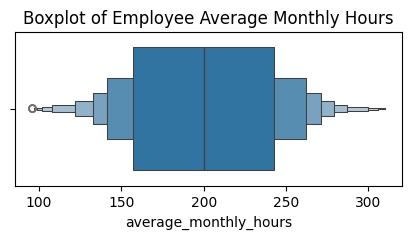

In [15]:
plt.figure(figsize=(5,2))
sns.boxenplot(data=df0, x='average_monthly_hours')
plt.title('Boxplot of Employee Average Monthly Hours')

In [16]:
def outlier_range(data, column):
    percentile25 = df0[column].quantile(0.25)
    percentile75 = df0[column].quantile(0.75)
    iqr = percentile75 - percentile25

    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr

    print(f"Lower limit for '{column}':", lower_limit)
    print(f"Upper limit for '{column}':", upper_limit)

    outliers = df0[(df0[column] > upper_limit) | (df0[column] < lower_limit)]
    print(f"Number of rows in the data containing outliers in '{column}':", len(outliers))
    
    return outliers  # optional, if you want to return the outlier rows

In [17]:
outlier_range(df0,'number_project')

Lower limit for 'number_project': 0.0
Upper limit for 'number_project': 8.0
Number of rows in the data containing outliers in 'number_project': 0


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,department,salary,status


In [18]:
outlier_range(df0, 'tenure')

Lower limit for 'tenure': 1.5
Upper limit for 'tenure': 5.5
Number of rows in the data containing outliers in 'tenure': 824


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,department,salary,status
1,0.80,0.86,5,262,6,0,0,sales,medium,1
17,0.78,0.99,4,255,6,0,0,sales,low,1
34,0.84,0.87,4,246,6,0,0,hr,low,1
47,0.57,0.70,3,273,6,0,0,support,low,1
67,0.90,0.98,4,264,6,0,0,product_mng,medium,1
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,1,management,high,0
11995,0.90,0.55,3,259,10,1,1,management,high,0
11996,0.74,0.95,5,266,10,0,1,management,high,0
11997,0.85,0.54,3,185,10,0,1,management,high,0


In [19]:
outlier_range(df0, 'average_monthly_hours')

Lower limit for 'average_monthly_hours': 28.0
Upper limit for 'average_monthly_hours': 372.0
Number of rows in the data containing outliers in 'average_monthly_hours': 0


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,department,salary,status


#### **`Takeway`**

> Among the variables in the data, tenure was the only group that we got outliers 824 employees. Now since models are sensitive to outliers I would proceed with that in mind. Will continue to keep the outliers in for now.

## **`Analyze Phase`**

> Exploring relationship between various variables


Text(0, 0.5, 'Frequency')

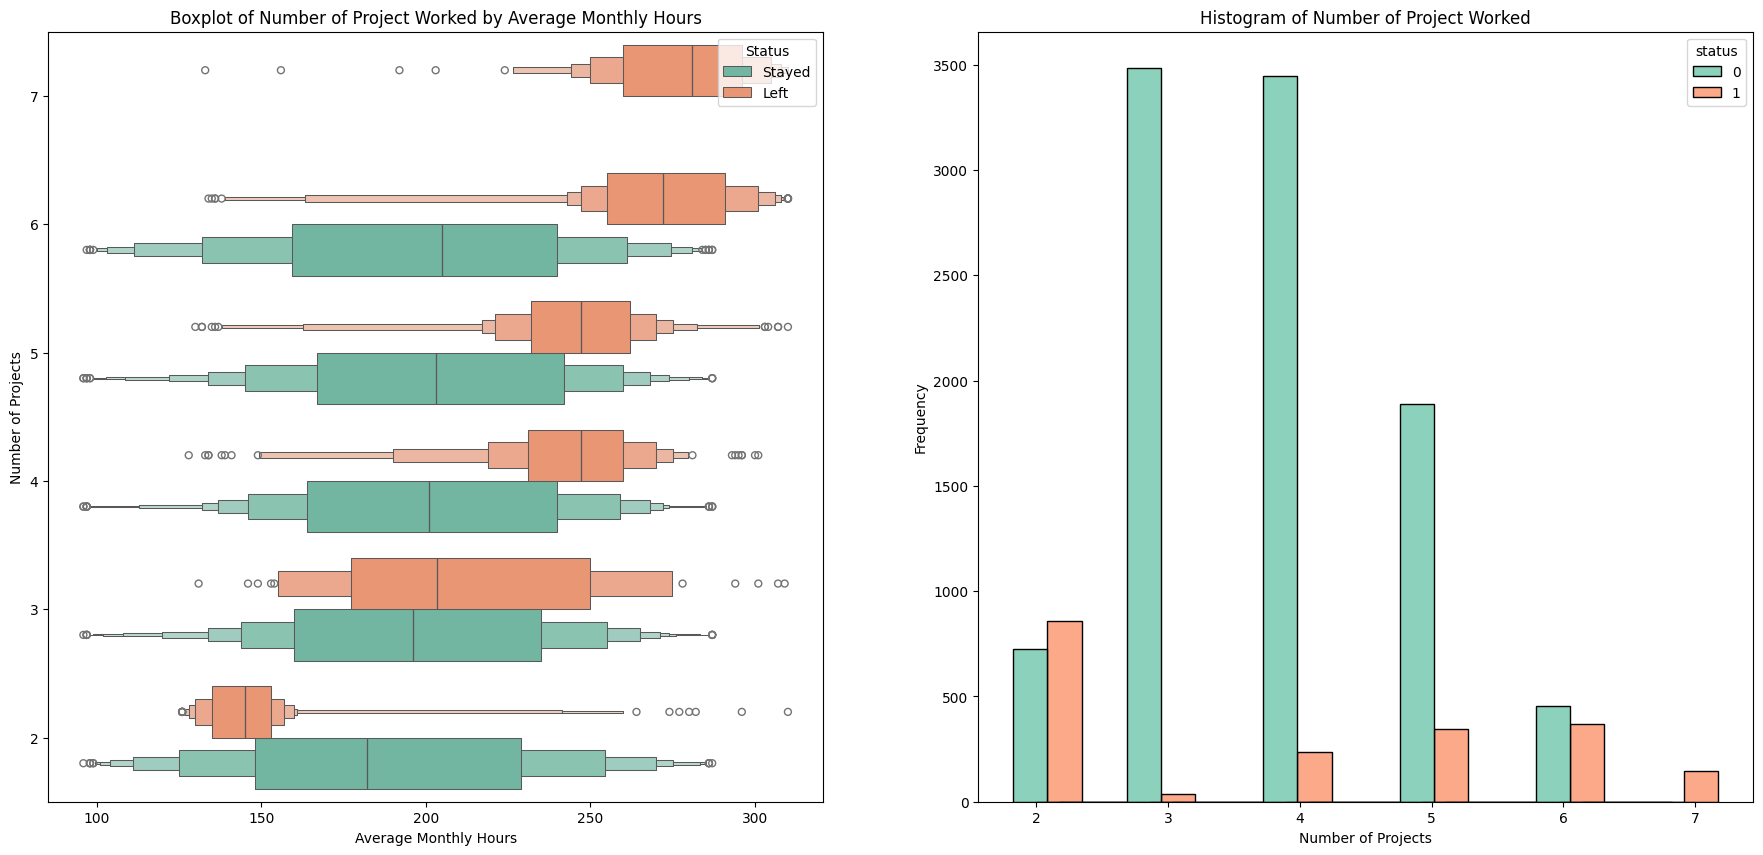

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(22,10))
sns.boxenplot(data=df0, x= 'average_monthly_hours', y='number_project', hue='status', palette='Set2', orient= 'h', ax= ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Boxplot of Number of Project Worked by Average Monthly Hours')
ax[0].set_xlabel('Average Monthly Hours')
ax[0].set_ylabel('Number of Projects')
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles=handles, labels=['Stayed', 'Left'], title='Status')


sns.histplot(data=df0, x='number_project', hue='status', palette='Set2', multiple='dodge', shrink=3, ax=ax[1])
ax[1].set_title('Histogram of Number of Project Worked')
ax[1].set_xlabel('Number of Projects')
ax[1].set_ylabel('Frequency')

`Takeaways`

> - Employees with 6–7 projects worked extreme hours (255–295 hours/month).

> - All employees with 7 projects left — a red flag for overwork.

> - Optimal range for retention: 3–4 projects.

> - Average hours exceed the standard 167/month for nearly all employees → Overwork is widespread.

C:\Users\USER\AppData\Local\Temp\ipykernel_33384\4244983050.py:11: UserWarning: Mismatched number of handles and labels: len(handles) = 3 len(labels) = 4
  plt.legend(handles=handles, labels=labels + [f'Mean = {avg_wrk_hrs:.2f}hrs/mo'], title='Status')


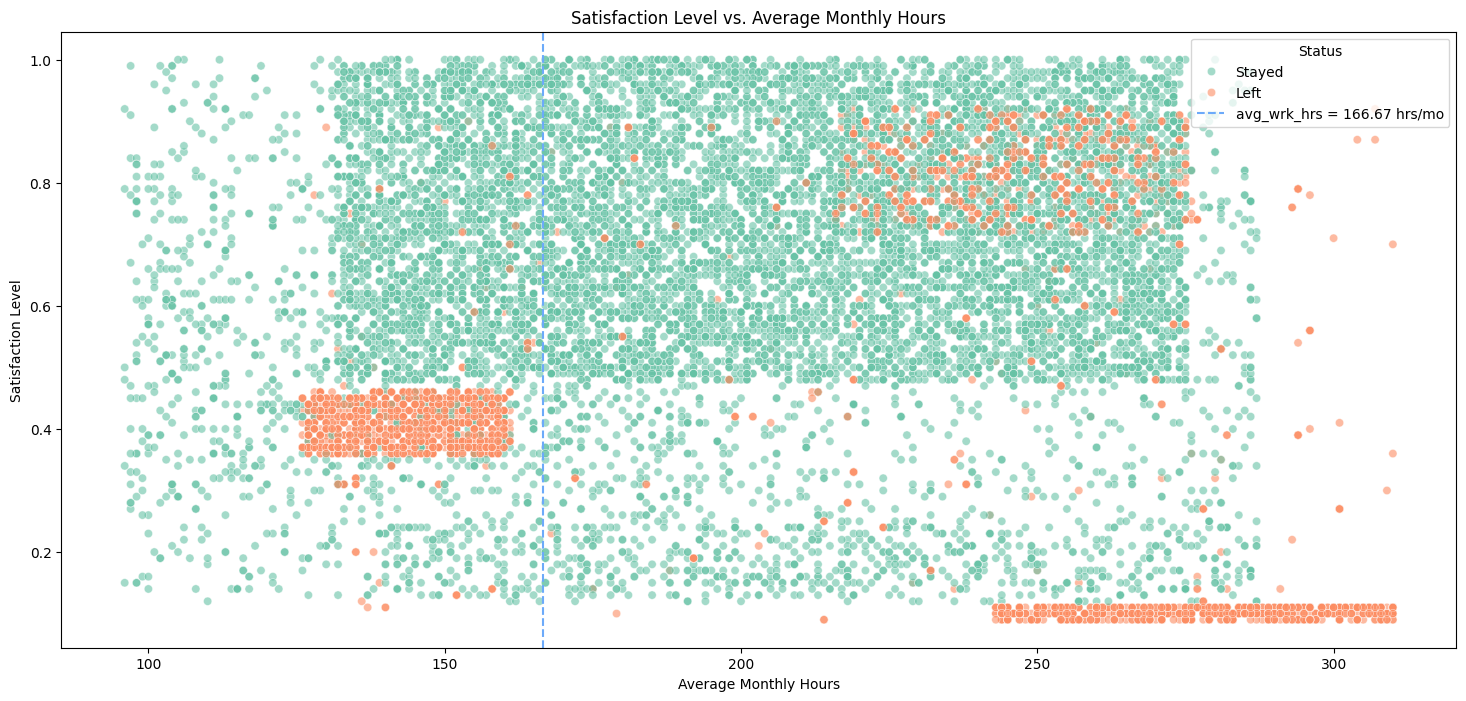

In [21]:
avg_wrk_hrs = 166.67

plt.figure(figsize=(18, 8))
sns.scatterplot(data=df, x='average_monthly_hours', y='satisfaction_level', 
                hue='status', palette='Set2', alpha=0.6)
plt.axvline(x=166.67, color="#6caafa", linestyle='--', label=f'avg_wrk_hrs = {avg_wrk_hrs:.2f} hrs/mo')


handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Stayed' if lbl == '0' else 'Left' if lbl == '1' else lbl for lbl in labels]
plt.legend(handles=handles, labels=labels + [f'Mean = {avg_wrk_hrs:.2f}hrs/mo'], title='Status')

# Titles and labels
plt.title('Satisfaction Level vs. Average Monthly Hours')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Satisfaction Level')
plt.show()

`Takeaway`

>- Two risk groups:

>- Overworked high contributors with very low satisfaction.

>- Employees working average hours but still dissatisfied (satisfaction ~0.4).

>- Some stayed despite being overworked, likely driven by high evaluation scores or loyalty.

>- Satisfaction level is a major predictor of attrition.

In [22]:
df0.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,department,salary,status
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [23]:
df0.groupby('status')['satisfaction_level'].agg(['mean', 'median', 'min', 'max'])

,mean,median,min,max
status,,,,
0,0.667365,0.69,0.12,1.00
1,0.440271,0.41,0.09,0.92


Text(0, 0.5, 'Frequency')

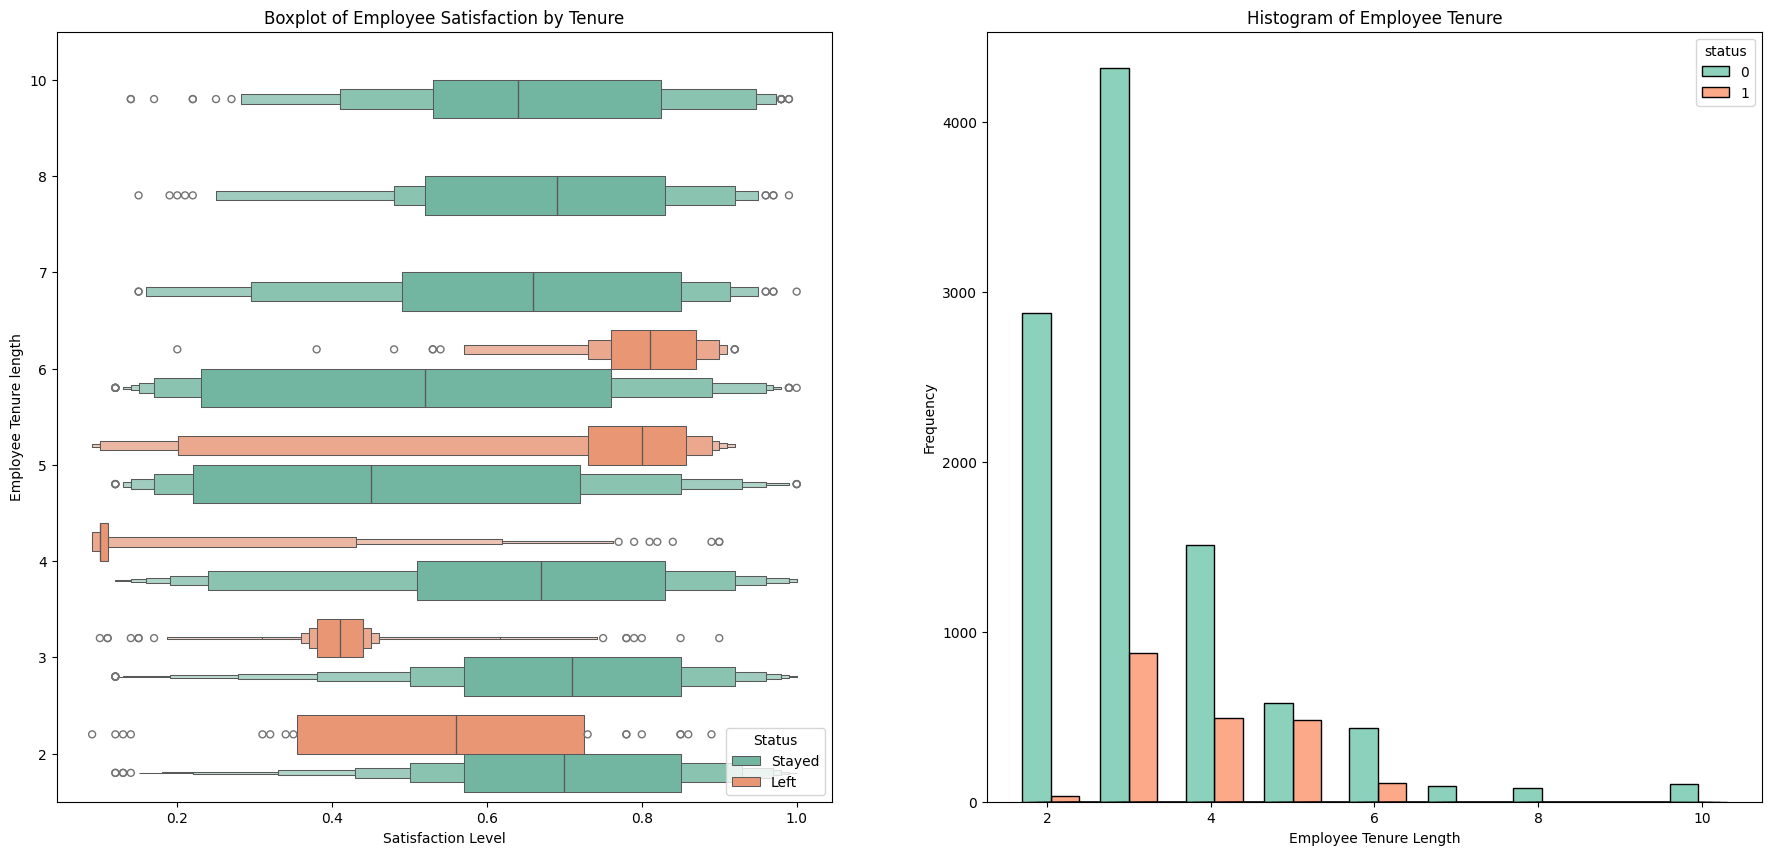

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(22,10))
sns.boxenplot(data=df0, x= 'satisfaction_level', y='tenure', hue='status', palette='Set2', orient= 'h', ax= ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Boxplot of Employee Satisfaction by Tenure')
ax[0].set_xlabel('Satisfaction Level')
ax[0].set_ylabel('Employee Tenure length')
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles=handles, labels=['Stayed', 'Left'], title='Status')

sns.histplot(data=df0, x='tenure', hue='status', palette='Set2', multiple='dodge', shrink=8, ax=ax[1])
ax[1].set_title('Histogram of Employee Tenure')
ax[1].set_xlabel('Employee Tenure Length')
ax[1].set_ylabel('Frequency')

`Takeaway`

>- Long-tenured employees (6+ years) tend not to leave.

>- Unusually low satisfaction observed among 4-year tenure employees → investigate company policies for this group.

>- Employees who left are either:

>Very dissatisfied with short tenure, or
    
>Satisfied but with medium-length tenure — possibly seeking external growth opportunities.

C:\Users\USER\AppData\Local\Temp\ipykernel_33384\2851685887.py:7: UserWarning: Mismatched number of handles and labels: len(handles) = 3 len(labels) = 4
  plt.legend(handles=handles, labels=labels + [f'Mean = {avg_wrk_hrs:.2f}hrs/mo'], title='Status')


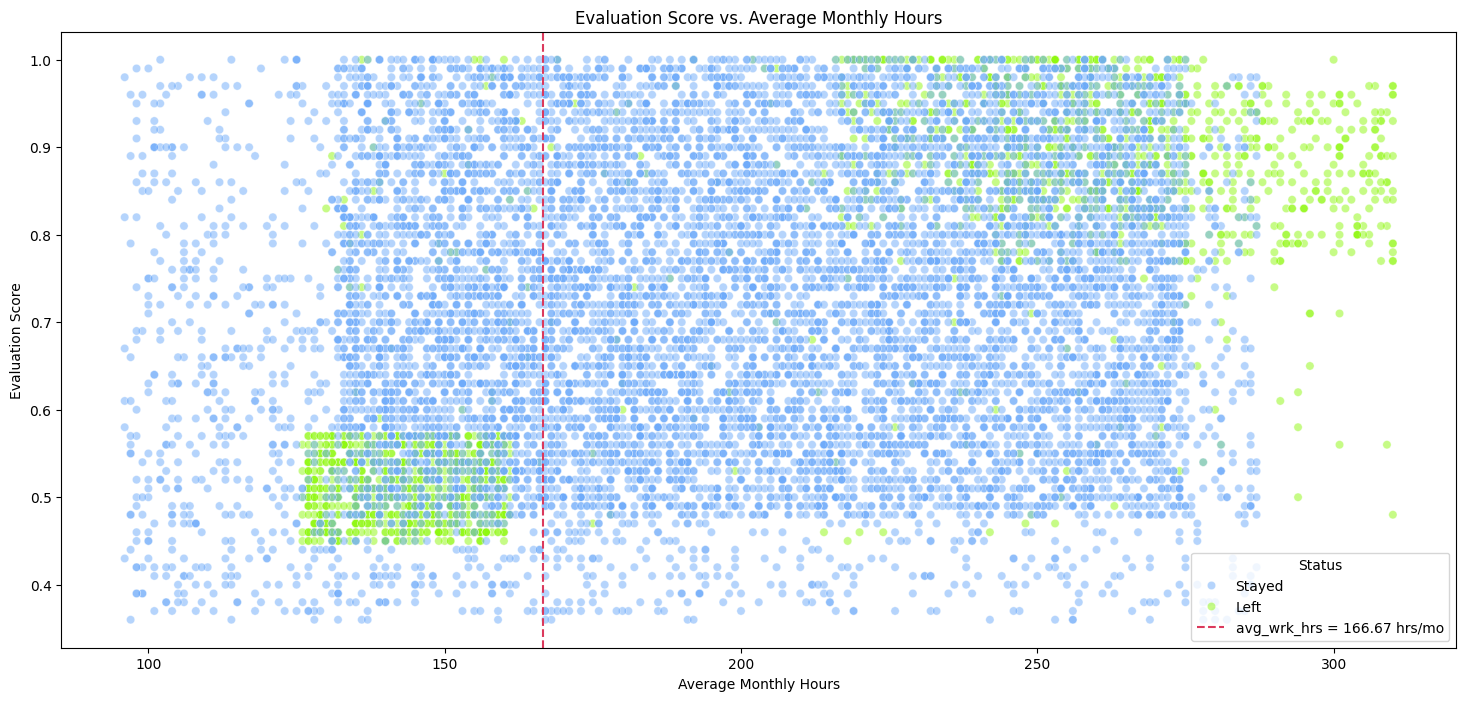

In [25]:
plt.figure(figsize=(18,8))
sns.scatterplot(data=df0, x='average_monthly_hours', y='last_evaluation', hue='status',palette=["#6caafa", "#8ff80f"] , alpha=0.5)
plt.axvline(x=166.67, color="#db395c", linestyle='--', label=f'avg_wrk_hrs = {avg_wrk_hrs:.2f} hrs/mo')

handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Stayed' if lbl == '0' else 'Left' if lbl == '1' else lbl for lbl in labels]
plt.legend(handles=handles, labels=labels + [f'Mean = {avg_wrk_hrs:.2f}hrs/mo'], title='Status')

# Titles and labels
plt.title('Evaluation Score vs. Average Monthly Hours')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Evaluation Score')
plt.show()

`Takeaways`

> Our analysis revealed two clear groups of departing employees:

> - **`Group A: Underperformers`**

>- Worked fewer hours than peers on similar projects
>- Lower evaluation scores
>- Possibly terminated or assigned fewer hours due to poor performance

> - **`Group B: High Performers (Burnout Cases)`**

>- Worked significantly more hours (240-315+ hours/month)
>- High evaluation scores
>- Likely quit due to overwork and burnout
>- Most valuable employees lost to company

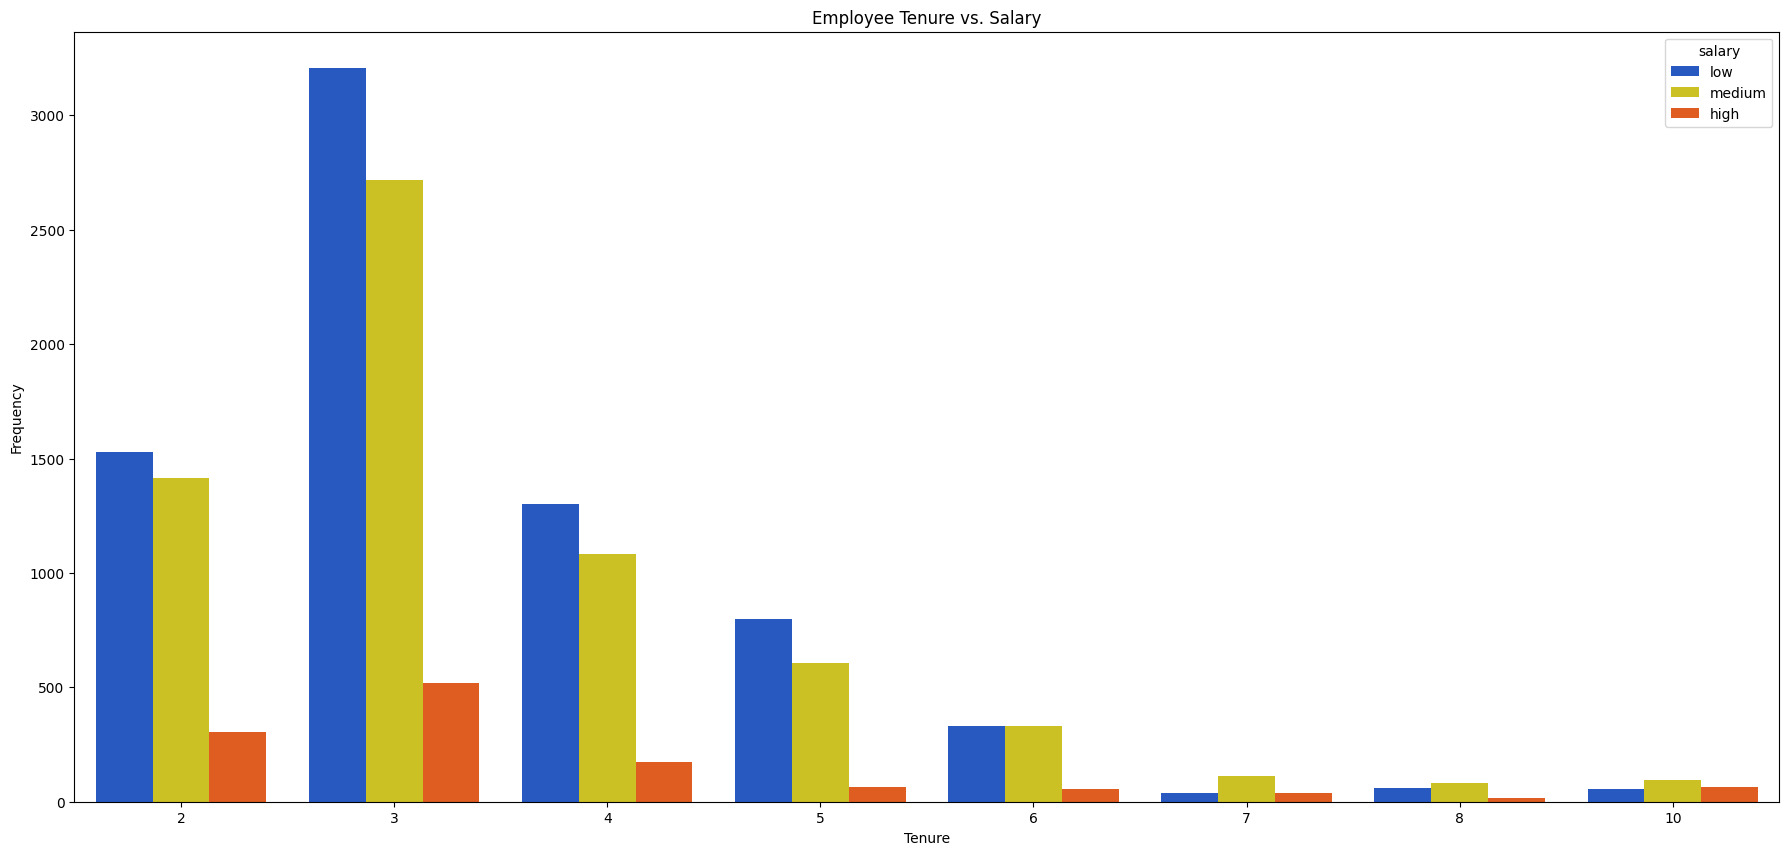

In [87]:
avg_tenure = 5.5

plt.figure(figsize=(22, 10))
sns.countplot(data=df, x='tenure', 
                hue='salary', palette=["#0d51d9","#e7d808", "#ff5100"])

# Titles and labels
plt.title('Employee Tenure vs. Salary')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

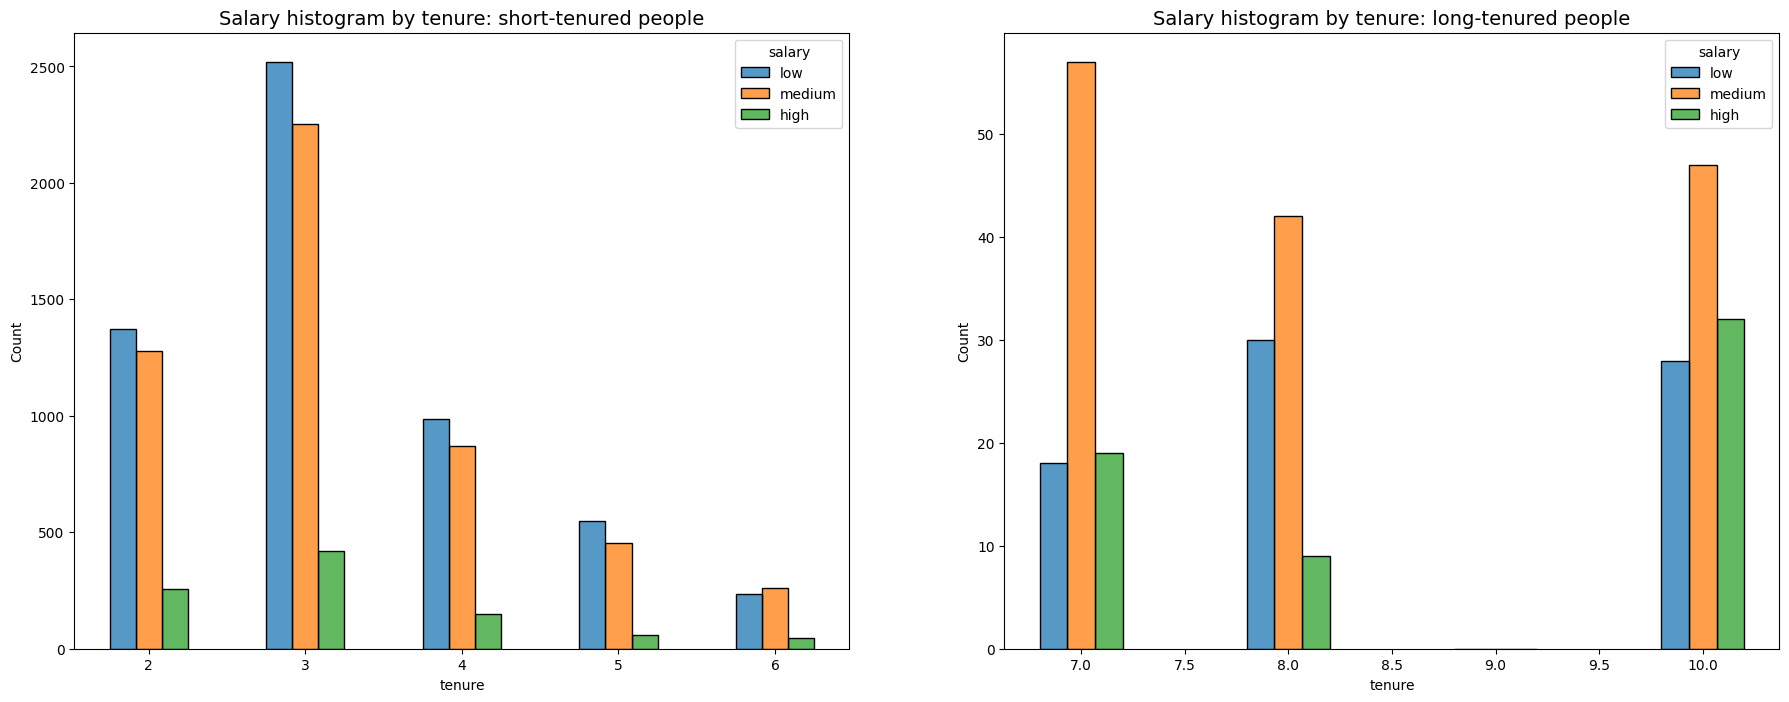

In [27]:

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df0[df0['tenure'] < 7]

# Define long-tenured employees
tenure_long = df0[df0['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

`Takeaway`

C:\Users\USER\AppData\Local\Temp\ipykernel_33384\3549030357.py:7: UserWarning: Mismatched number of handles and labels: len(handles) = 3 len(labels) = 4
  plt.legend(handles=handles, labels=labels + [f'Mean = {avg_wrk_hrs:.2f}hrs/mo'], title='Status')


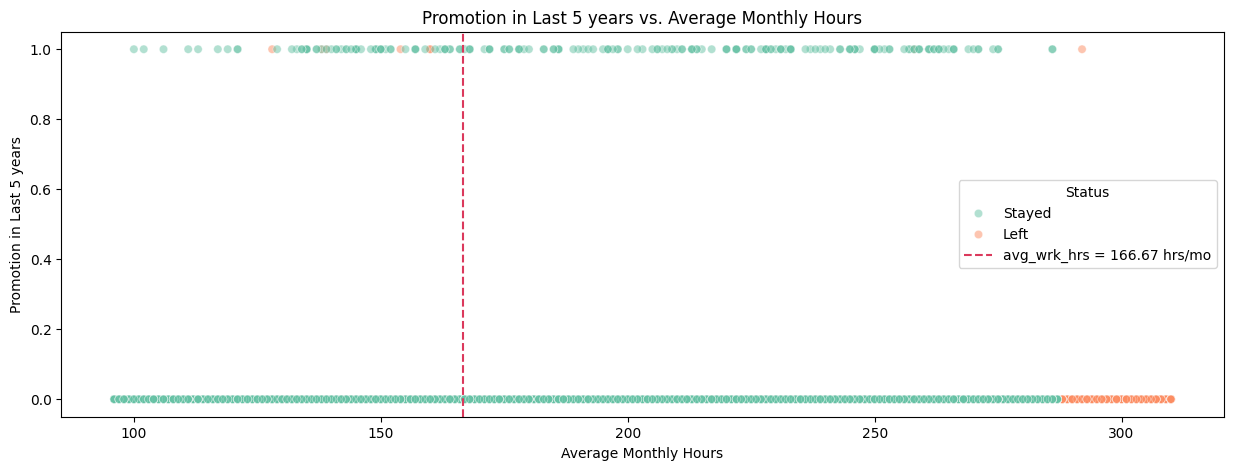

In [28]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df0, x='average_monthly_hours', y='promotion_last_5years', hue='status',palette='Set2' , alpha=0.5)
plt.axvline(x=166.67, color="#db395c", linestyle='--', label=f'avg_wrk_hrs = {avg_wrk_hrs:.2f} hrs/mo')

handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Stayed' if lbl == '0' else 'Left' if lbl == '1' else lbl for lbl in labels]
plt.legend(handles=handles, labels=labels + [f'Mean = {avg_wrk_hrs:.2f}hrs/mo'], title='Status')

# Titles and labels
plt.title('Promotion in Last 5 years vs. Average Monthly Hours')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Promotion in Last 5 years')
plt.show()

`Takeaway`

>- Alarming Statistics:

> Very few employees who worked the longest hours received promotions

> Minimal promotion activity overall (2.1% promotion rate in last 5 years)

> High-performing, overworked employees feel undervalued

In [29]:
df0['department'].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

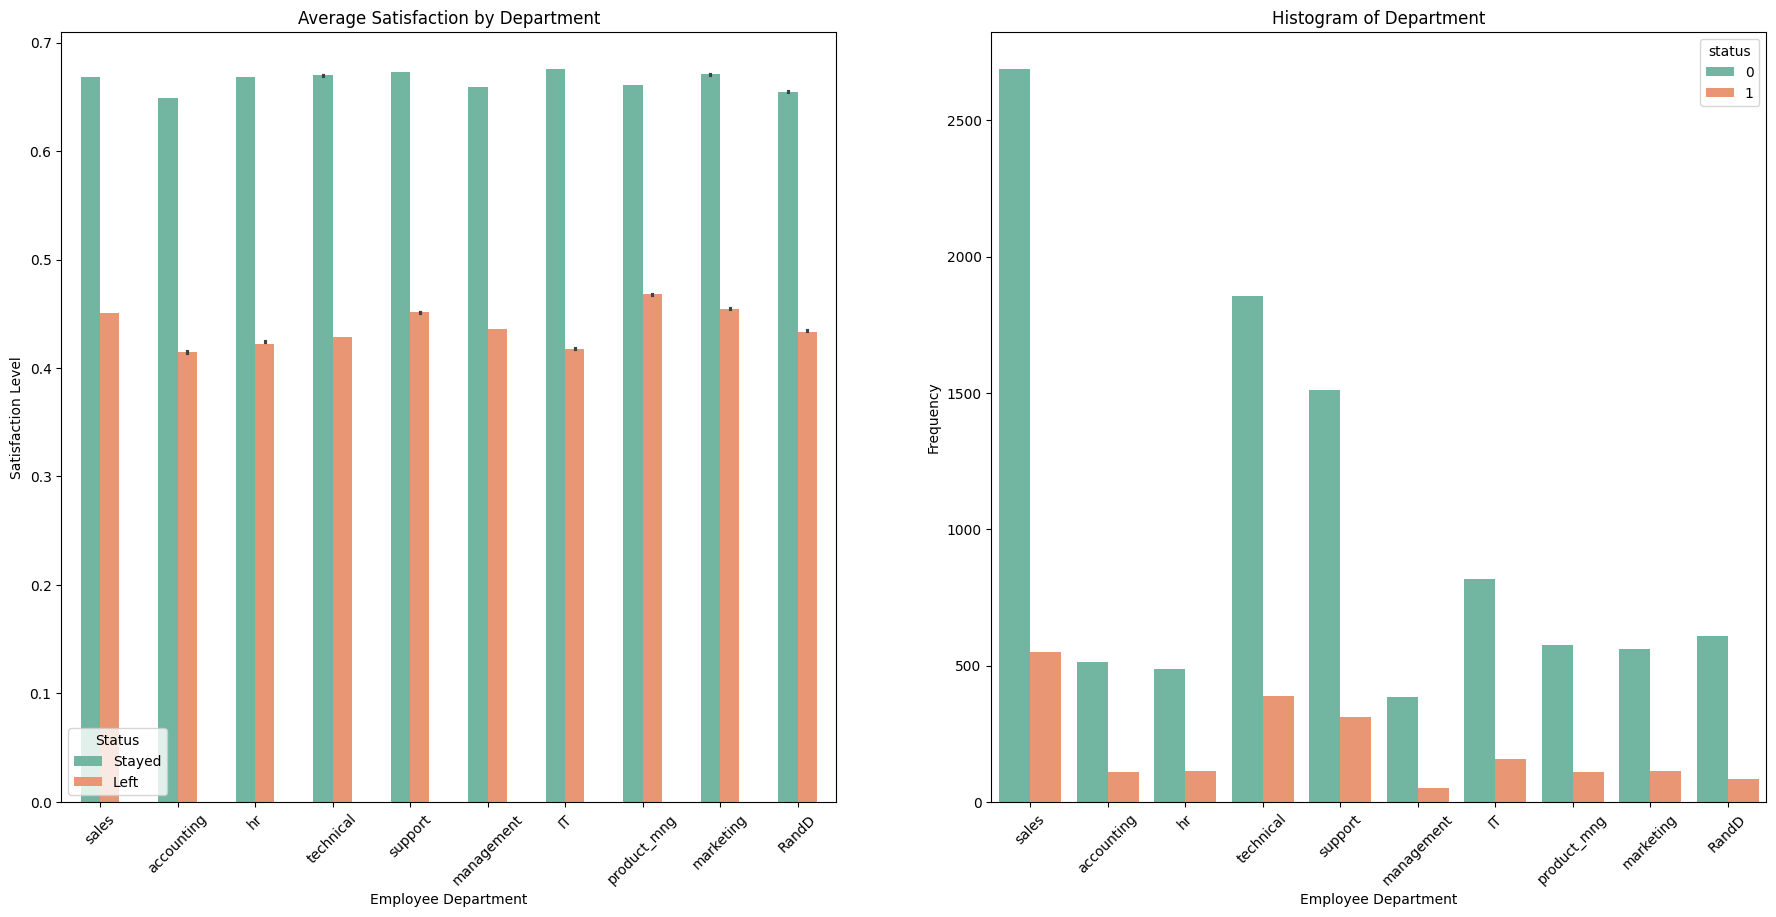

In [84]:
fig, ax = plt.subplots(1, 2, figsize=(22,10))
# Satisfaction distribution by department & status
sns.barplot(data=df0, x='department', y='satisfaction_level', hue='status', 
            palette='Set2', errorbar= ('ci', 0.95), dodge=True, width=0.5, ax=ax[0])
ax[0].set_title('Average Satisfaction by Department')
ax[0].set_xlabel('Employee Department')
ax[0].set_ylabel('Satisfaction Level')
ax[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles=handles, labels=['Stayed', 'Left'], title='Status')

sns.countplot(data=df0, x='department', hue='status', palette='Set2', ax=ax[1])
ax[1].set_title('Histogram of Department')
ax[1].tick_params(axis='x', rotation=45) 
ax[1].set_xlabel('Employee Department')
ax[1].set_ylabel('Frequency')

`Takeways`

> There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed. 

`Insights`

>- It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave.  

In [31]:
df0.groupby('department')['satisfaction_level'].agg(['mean', 'min', 'max'])

,mean,min,max
department,,,
IT,0.634016,0.09,1.0
RandD,0.627176,0.09,1.0
accounting,0.607939,0.09,1.0
hr,0.621947,0.09,1.0
management,0.631995,0.09,1.0
marketing,0.634770,0.09,1.0
product_mng,0.629825,0.09,1.0
sales,0.631349,0.09,1.0
support,0.634822,0.09,1.0


In [32]:
df0['status'].value_counts()

status
0    10000
1     1991
Name: count, dtype: int64

In [33]:
df1=df0.copy()
df1['salary_enc']  = df1['salary'].map({'low': 0, 'medium':1, 'high':2})
df1['status_enc'] = df1['status'].map({0: 'stayed', 1:'left'})
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,department,salary,status,salary_enc,status_enc
0,0.38,0.53,2,157,3,0,0,sales,low,1,0,left
1,0.80,0.86,5,262,6,0,0,sales,medium,1,1,left
2,0.11,0.88,7,272,4,0,0,sales,medium,1,1,left
3,0.72,0.87,5,223,5,0,0,sales,low,1,0,left
4,0.37,0.52,2,159,3,0,0,sales,low,1,0,left


In [34]:
df1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident',
       'promotion_last_5years', 'department', 'salary', 'status', 'salary_enc',
       'status_enc'],
      dtype='object')

In [35]:
df1.drop(['salary', 'status_enc'], axis=1, inplace=True)
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,department,status,salary_enc
0,0.38,0.53,2,157,3,0,0,sales,1,0
1,0.80,0.86,5,262,6,0,0,sales,1,1
2,0.11,0.88,7,272,4,0,0,sales,1,1
3,0.72,0.87,5,223,5,0,0,sales,1,0
4,0.37,0.52,2,159,3,0,0,sales,1,0


In [36]:
df1=df1[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident',
       'promotion_last_5years', 'status', 'salary_enc']]
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,status,salary_enc
0,0.38,0.53,2,157,3,0,0,1,0
1,0.80,0.86,5,262,6,0,0,1,1
2,0.11,0.88,7,272,4,0,0,1,1
3,0.72,0.87,5,223,5,0,0,1,0
4,0.37,0.52,2,159,3,0,0,1,0


#### **`Correlation Relationship between Variable`**

In [37]:
df1.corr()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,status,salary_enc
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,0.019789,-0.350558,0.029241
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,-0.007206,0.013520,-0.015775
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,-0.000544,0.030928,-0.000502
average_monthly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,-0.004964,0.070409,-0.000551
tenure,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.056828,0.173295,0.038164
work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,0.029852,-0.125436,-0.000058
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,1.000000,-0.044657,0.087851
status,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,-0.044657,1.000000,-0.118882
salary_enc,0.029241,-0.015775,-0.000502,-0.000551,0.038164,-0.000058,0.087851,-0.118882,1.000000


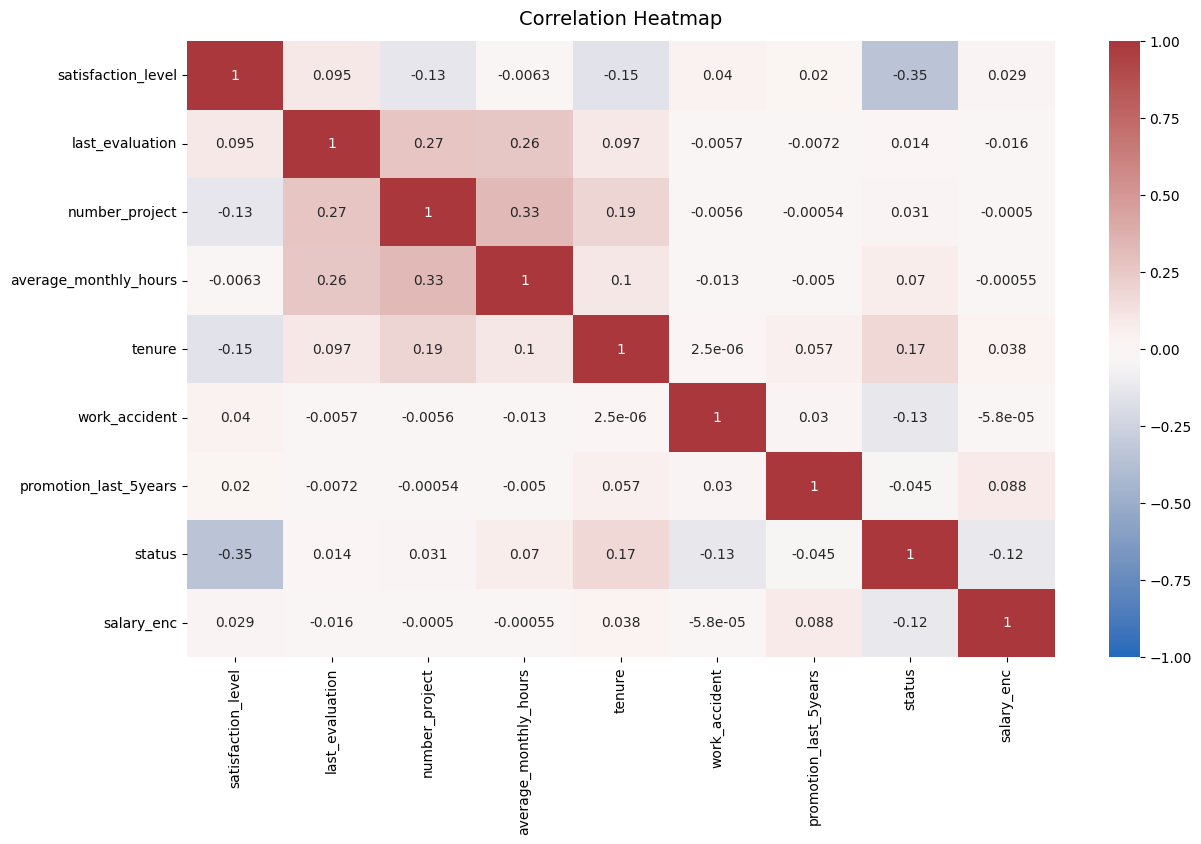

In [38]:
plt.figure(figsize=(14, 8))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

## **`Construct Phase`**

### **Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables 
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size 


#### **Model Assumption: Resolving Outliers**

- Removing outliers before building a the model

- Converting Categorical predictors by Encoding

In [39]:

df_enc = df0.copy()

#Converting my predictor(x) categorical variables by One hot encoding.
df_enc = pd.get_dummies(df_enc, prefix=['salary', 'dept'], columns=['salary', 'department'], drop_first=False)

#Since we are constructing a logistic regression model which is sensitive to outliers, we remove them.

#Since only tenure showed massive otliers we use it for standardizing the dataset

# Computing the 25th percentile value in `tenure`
percentile25 = df0['tenure'].quantile(0.25)

# Computing the 75th percentile value in `tenure`
percentile75 = df0['tenure'].quantile(0.75)

iqr = percentile75 - percentile25

# Defining the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

df_logreg = df_enc[(df_enc['tenure']>=lower_limit ) & (df_enc['tenure']<=upper_limit)]

In [40]:
df_logreg.head()
"""# Convert bools to 0/1
df_enc = df_enc.astype(int)"""

'# Convert bools to 0/1\ndf_enc = df_enc.astype(int)'

In [41]:
df_logreg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11167 entries, 0 to 11999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11167 non-null  float64
 1   last_evaluation        11167 non-null  float64
 2   number_project         11167 non-null  int64  
 3   average_monthly_hours  11167 non-null  int64  
 4   tenure                 11167 non-null  int64  
 5   work_accident          11167 non-null  int64  
 6   promotion_last_5years  11167 non-null  int64  
 7   status                 11167 non-null  int64  
 8   salary_high            11167 non-null  bool   
 9   salary_low             11167 non-null  bool   
 10  salary_medium          11167 non-null  bool   
 11  dept_IT                11167 non-null  bool   
 12  dept_RandD             11167 non-null  bool   
 13  dept_accounting        11167 non-null  bool   
 14  dept_hr                11167 non-null  bool   
 15  dept_ma

In [42]:
df_enc.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident',
       'promotion_last_5years', 'status', 'salary_high', 'salary_low',
       'salary_medium', 'dept_IT', 'dept_RandD', 'dept_accounting', 'dept_hr',
       'dept_management', 'dept_marketing', 'dept_product_mng', 'dept_sales',
       'dept_support', 'dept_technical'],
      dtype='object')

#### **Model Assumption: No multicolinearity**

- Using correlation to check the relationship between variables

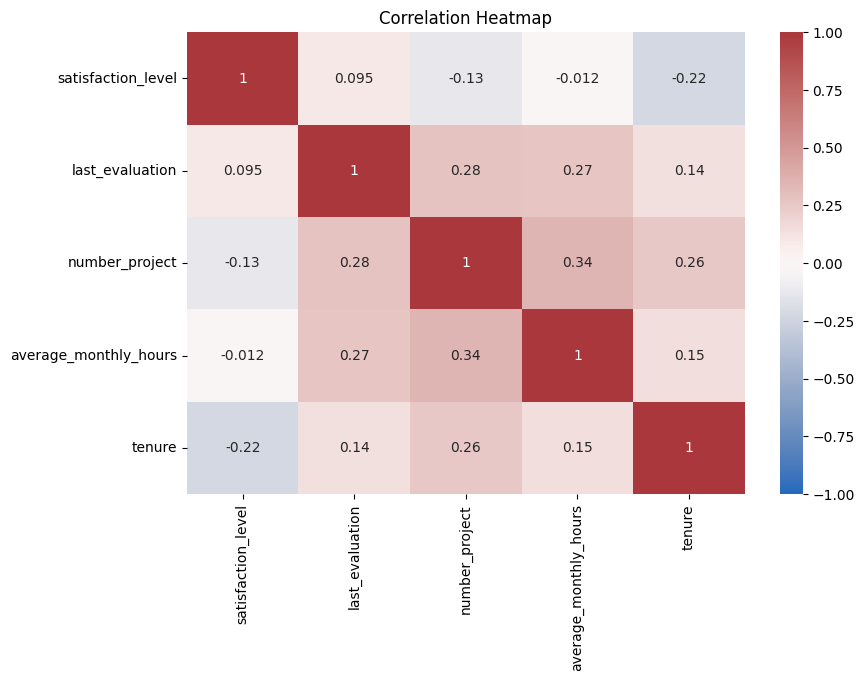

In [43]:
plt.figure(figsize=(9, 6))
heatmap = sns.heatmap(df_logreg[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure']].corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap');


**`Feature Selection`**

In [44]:
y = df_logreg[['status']]
X = df_logreg[['satisfaction_level', 'last_evaluation', 'number_project',
                'average_monthly_hours', 'tenure', 'work_accident', 'promotion_last_5years', 'salary_high', 'salary_low', 'salary_medium' , 
                'dept_IT', 'dept_RandD', 'dept_accounting', 'dept_hr', 'dept_management', 'dept_marketing', 'dept_product_mng', 'dept_sales', 'dept_support', 'dept_technical']]
y.head()

,status
0,1
2,1
3,1
4,1
5,1


In [45]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary_high,salary_low,salary_medium,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,0,False,True,False,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,False,False,True,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,False,True,False,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,False,True,False,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,0,False,True,False,False,False,False,False,False,False,False,True,False,False


In [46]:
df_logreg['status'].value_counts(normalize=True)

status
0    0.831468
1    0.168532
Name: proportion, dtype: float64

**Spliting the data into training set and testing set.**

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y, random_state=42)

**Constructing the Model**

In [48]:
#Constructing the model, fitting the training data into the logistic model
log_clf = LogisticRegression(max_iter=500).fit(X_train, y_train)

# Using the model to get predictions on the test set
y_pred = log_clf.predict(X_test)

c:\Users\USER\Documents\Data Science Repositories\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\Documents\Data Science Repositories\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
pd.Series(log_clf.coef_[0], index=X.columns)

satisfaction_level      -4.324314
last_evaluation         -0.050232
number_project          -0.489058
average_monthly_hours    0.003852
tenure                   1.102492
work_accident           -1.477362
promotion_last_5years   -1.299309
salary_high             -1.285854
salary_low               0.271339
salary_medium           -0.152793
dept_IT                 -0.112228
dept_RandD              -0.321778
dept_accounting         -0.256972
dept_hr                  0.005768
dept_management         -0.197665
dept_marketing          -0.100091
dept_product_mng        -0.205477
dept_sales               0.005085
dept_support             0.008485
dept_technical           0.007564
dtype: float64

In [55]:
pd.Series(log_clf.intercept_[0])

0   -1.619332
dtype: float64

#### **Model Assumption: Linear Relationship**
- Linear relationship between each X variable and the logit of the outcome variable


In [57]:
# Retrieving the predicted probabilities of the training data
training_probabilities = log_clf.predict_proba(X_train)
training_probabilities

array([[0.94841642, 0.05158358],
       [0.5897626 , 0.4102374 ],
       [0.93619183, 0.06380817],
       ...,
       [0.90289106, 0.09710894],
       [0.97451479, 0.02548521],
       [0.12531575, 0.87468425]])

In [64]:
logit_data = X_train.copy()
logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in training_probabilities]

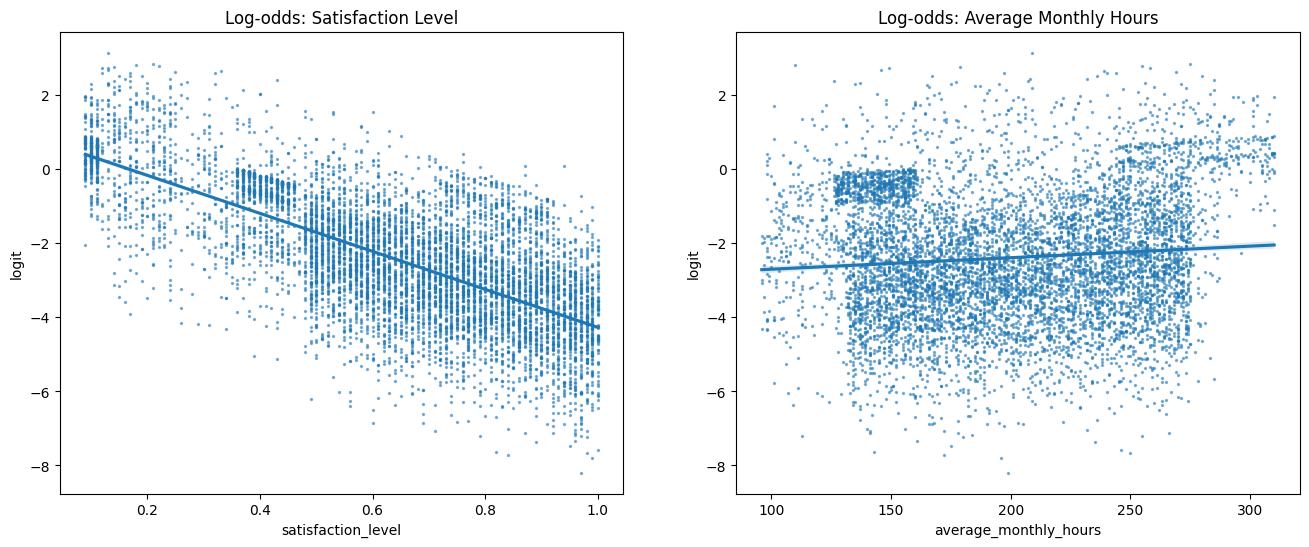

In [72]:
figure, ax = plt.subplots(1,2,  figsize =(16,6))
sns.regplot(x='satisfaction_level', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5}, ax=ax[0])
ax[0].set_title('Log-odds: Satisfaction Level')


sns.regplot(x='average_monthly_hours', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5}, ax=ax[1])
ax[1].set_title('Log-odds: Average Monthly Hours');

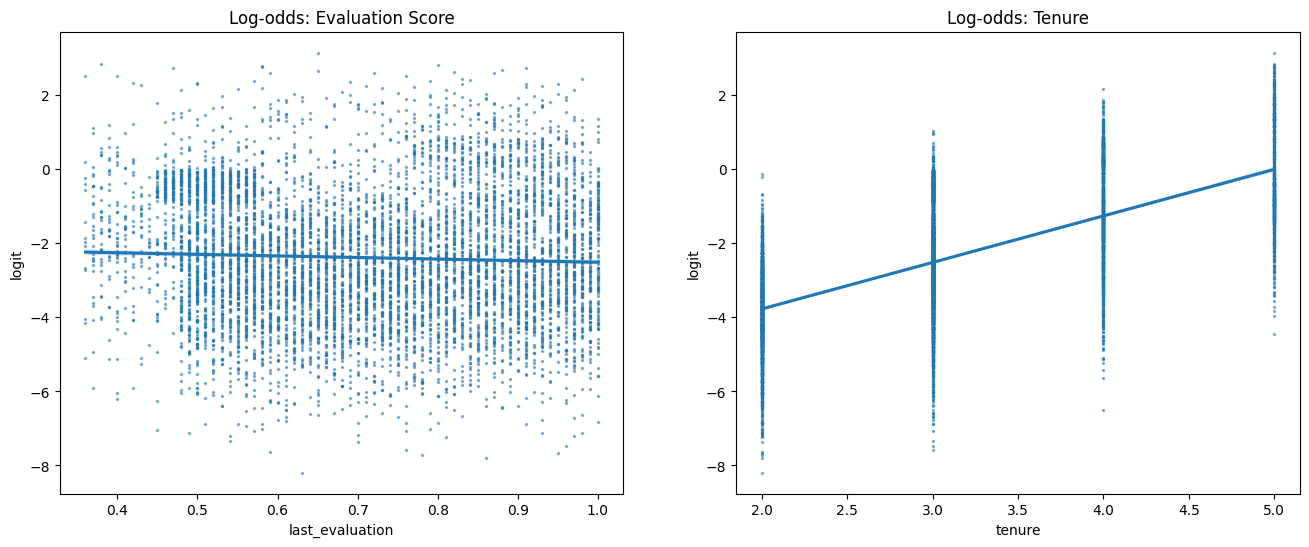

In [73]:
figure, ax = plt.subplots(1,2,  figsize =(16,6))
sns.regplot(x='last_evaluation', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5}, ax=ax[0])
ax[0].set_title('Log-odds: Evaluation Score')


sns.regplot(x='tenure', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5}, ax=ax[1])
ax[1].set_title('Log-odds: Tenure');

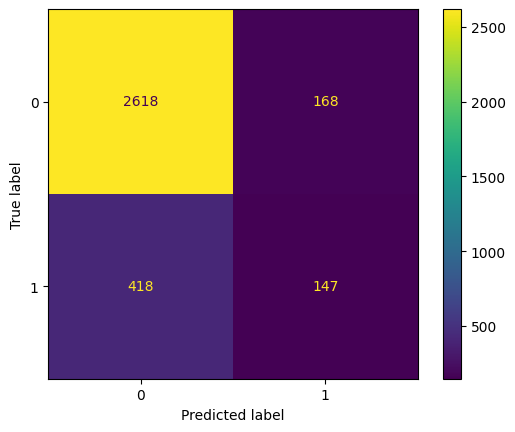

In [49]:
#Building a confusion matrix 
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)
log_dispcm = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)
log_dispcm.plot()


**A perfect model would yield all true negatives and true positives, and no false negatives or false positives.**

>- True negatives(upper-left quadrant): The number of people who did not leave that the model accurately predicted did not leave.

>- False positives(upper-right quadrant): The number of people who did not leave the model inaccurately predicted as leaving.

>- False negatives(lower-left quadrant): The number of people who left that the model inaccurately predicted did not leave

>- True positives(lower-right quadrant): The number of people who left the model accurately predicted as leaving



In [56]:
# Creating classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.94      0.90      2786
    Predicted would leave       0.47      0.26      0.33       565

                 accuracy                           0.83      3351
                macro avg       0.66      0.60      0.62      3351
             weighted avg       0.80      0.83      0.80      3351



#### **`Insights`**

> **Note:** The model has poor precision and very low recall, which means that it makes a lot of false negative predictions and fails to capture users who would leave. Which is important information to our business need.

> - Before we built the model we stratified it, this is because:
>  the proportion of `Status`, those who stayed to those who left : 83.1% - 16.8%

> - Stayed = 83.1%
> - Left = 16.8%

What it Means:
- Precision for "Leave" class is low (0.47) → Many people predicted to leave actually stayed.

- Recall for "Leave" class is very low (0.26) → The model missed 74% of people who actually left.

- F1-score is 0.33 for the “Leave” class → Poor balance between precision and recall.

- Accuracy is high (83%) — but this is misleading due to class imbalance (most people stayed).

> 🔴 In short: the model is biased toward predicting "Stayed" and fails to capture the “Leaving” employees.

Although this is not that of a signifacant class imbalance.
I want to make the class more closely balance to see if it will improve the model performance.

#### **`Class Weights with Logistic Regression Model`**

In [74]:
log_cw = LogisticRegression(class_weight='balanced', random_state=42, max_iter=500).fit(X_train, y_train)
y_predcw = log_cw.predict(X_test)

c:\Users\USER\Documents\Data Science Repositories\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\Documents\Data Science Repositories\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


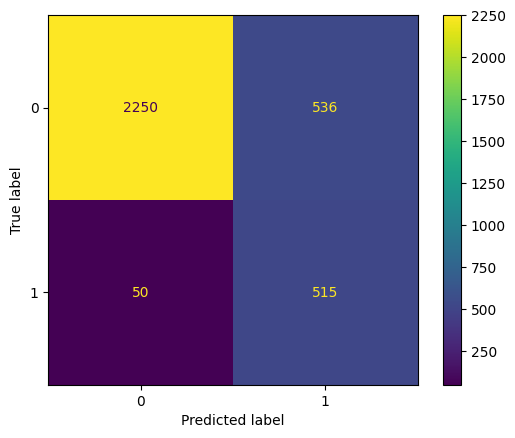

In [75]:
#Building a confusion matrix for class weight
log_cm1 = confusion_matrix(y_test, y_predcw, labels=log_cw.classes_)
log_dispcm1 = ConfusionMatrixDisplay(confusion_matrix=log_cm1, display_labels=log_cw.classes_)
log_dispcm1.plot()

In [76]:
# Creating classification report for the class weighted logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_predcw, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.98      0.81      0.88      2786
    Predicted would leave       0.49      0.91      0.64       565

                 accuracy                           0.83      3351
                macro avg       0.73      0.86      0.76      3351
             weighted avg       0.90      0.83      0.84      3351



#### `Insights:`

**What Changed:**

Precision for "Leave" is lower (0.49) but:

Recall for "Leave" jumped to 0.91 → The model now detects most of those who actually left.

F1-score for "Leave" = 0.64 → Massive improvement in identifying at-risk employees.

Macro Avg F1-score = 0.76 → Much better balance overall.

✅ Now the model is much more fair and useful for identifying employees likely to leave.


📊 Key Trade-Off: Accuracy vs. Fairness

| Metric               | Without Class Weights | With Class Weights |
|----------------------|----------------|---------------- |
| Accuracy             |    83%	        |   83%	          |
| Recall (Leave class) | 0.26           |  0.91 ✅        |
| Precision (Leave)    | 0.47           | 0.49            |
| F1-score (Leave)     | 0.33           | 0.64 ✅         |


		
> ✅ Sacrificed some accuracy and added more false positives, but you gained huge improvements in detecting the employees who might leave, which is exactly what you want in actual depatures prediction!
		

In [79]:
pd.Series(log_cw.intercept_[0])

0   -0.923243
dtype: float64

In [77]:
# Create a list of (column_name, coefficient) tuples
feature_importance = list(zip(X_train.columns, log_cw.coef_[0]))

# Sort the list by coefficient value
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)
feature_importance

[('tenure', np.float64(1.7442668141594062)),
 ('salary_low', np.float64(0.3887814977968867)),
 ('dept_hr', np.float64(0.09724143960194293)),
 ('dept_sales', np.float64(0.07124767931061078)),
 ('dept_technical', np.float64(0.019693147744644528)),
 ('dept_support', np.float64(0.003993937136405731)),
 ('average_monthly_hours', np.float64(0.0030080530798722773)),
 ('salary_medium', np.float64(-0.003415260442575084)),
 ('last_evaluation', np.float64(-0.015179989281662159)),
 ('dept_management', np.float64(-0.05934623475231278)),
 ('dept_marketing', np.float64(-0.06596959767195734)),
 ('dept_IT', np.float64(-0.08444633743349289)),
 ('dept_product_mng', np.float64(-0.1415826740766765)),
 ('dept_accounting', np.float64(-0.21945865859127936)),
 ('dept_RandD', np.float64(-0.3040877958481974)),
 ('number_project', np.float64(-0.7006065461036647)),
 ('salary_high', np.float64(-1.0680813319370022)),
 ('promotion_last_5years', np.float64(-1.219322610528205)),
 ('work_accident', np.float64(-1.4609998

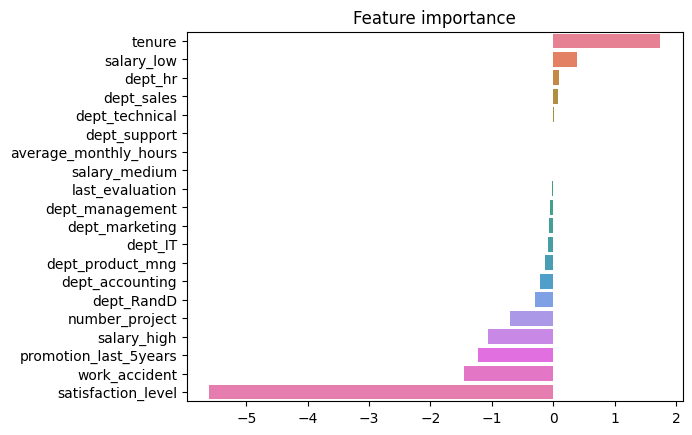

In [78]:
# Plotting the feature importances

sns.barplot(x=[x[1] for x in feature_importance],
            y=[x[0] for x in feature_importance],
            orient='h', hue=[x[0] for x in feature_importance])
plt.title('Feature importance');

### **`Interpreting Logistic Regression Coefficients – Salifort Motors Retention Model`**

This section breaks down the logistic regression coefficients used to predict whether an employee will leave Salifort Motors. Each coefficient (`β`) reflects how a one-unit change in the feature affects the **log-odds** of leaving, assuming all other variables are held constant.

To make it more interpretable, I also included **odds ratios** — a value >1 increases the chance of leaving, <1 decreases it.

-----
#### ⚙️ Model Intercept

- **Intercept (β₀):** `-0.9232`

📌 Interpretation:  
When all other features are 0 (baseline case), the **log-odds** of an employee leaving is -0.923.  
This corresponds to an odds of:

\[
Odds = e^{-0.9232} \approx 0.397
\]

So, the **baseline probability** of an employee leaving is:

\[
P = {0.397}/{1 + 0.397} == approx 28.4\%
\]


#### 🔥 Top Predictors of Employee Attrition

| Feature | Coefficient (β) | Odds Ratio (`exp(β)`) | Effect | Interpretation |
|--------|------------------|------------------------|--------|----------------|
| `satisfaction_level` | **-5.60** | 0.0037 | 🔻 Strong Decrease | Major factor: Higher satisfaction **dramatically reduces** the chance of leaving. |
| `work_accident` | -1.46 | 0.23 | 🔻 Decrease | Employees who had a work accident are **less likely** to leave, possibly due to added support. |
| `promotion_last_5years` | -1.22 | 0.30 | 🔻 Decrease | Promoted employees are **significantly more likely to stay**. |
| `salary_high` | -1.07 | 0.34 | 🔻 Decrease | High salary employees are **less likely** to leave. |
| `number_project` | -0.70 | 0.50 | 🔻 Decrease | More projects **lower churn** risk (but requires business context). |

---

#### ⚠️ Features That Increase Risk of Leaving

| Feature | Coefficient (β) | Odds Ratio (`exp(β)`) | Effect | Interpretation |
|--------|------------------|------------------------|--------|----------------|
| `tenure` | **+1.74** | 5.72 | 🔺 Strong Increase | Longer tenure increases attrition risk — may indicate burnout or stagnation. |
| `salary_low` | +0.39 | 1.48 | 🔺 Increase | Employees with low salary are more likely to leave. |
| `average_monthly_hours` | +0.003 | 1.003 | 🔺 Slight Increase | Each extra hour worked per month increases risk slightly. |

---

#### ➖ Features With Minor or Neutral Effects

| Feature | Coefficient (β) | Odds Ratio | Effect | Interpretation |
|--------|------------------|------------|--------|----------------|
| `dept_hr` | +0.097 | 1.10 | Slight Increase | Slightly more likely to leave. |
| `dept_sales` | +0.071 | 1.07 | Slight Increase | Minimal increase in churn. |
| `dept_technical` | +0.019 | 1.02 | Neutral | Very little effect. |
| `dept_support` | +0.004 | 1.00 | Neutral | Negligible impact. |
| `salary_medium` | -0.003 | 0.997 | Neutral | Slightly less likely to leave. |
| `last_evaluation` | -0.015 | 0.98 | Slight Decrease | Minor protective effect. |
| `dept_management` | -0.059 | 0.94 | Slight Decrease | Slightly less likely to leave. |
| `dept_marketing` | -0.066 | 0.94 | Slight Decrease | Small protective effect. |
| `dept_IT` | -0.084 | 0.92 | Slight Decrease | Lower risk compared to base group. |
| `dept_product_mng` | -0.142 | 0.87 | Decrease | Less likely to leave. |
| `dept_accounting` | -0.219 | 0.80 | Decrease | Moderate retention effect. |
| `dept_RandD` | -0.304 | 0.74 | Decrease | Good retention signal. |

---

### `Takeaways`

- **Increase Satisfaction:** The strongest retention lever. Prioritize surveys, 1-on-1s, team culture.
- **Recognize Contributions:** Promotions greatly reduce attrition — especially among long-tenured or high-performing staff.
- **Address Overwork and Fair Pay:** While extra hours have a mild effect, low salary has a strong correlation with leaving.
- **Watch for Mid-Tenure Risk:** Employees with higher tenure may feel stagnant and become a flight risk.
- **Model Supports Actionable HR Strategy:** Use the weighted logistic regression model for monthly HR check-ins and early interventions.

---



## **`Execute Phase`**

### **Business Recommendations**


> Immediate Actions (0-3 months)

- Project Load Management

Implement maximum 5 projects per employee policy

Redistribute workload from employees with 6+ projects

Monitor monthly hours to stay closer to 167-hour baseline


- Identify At-Risk Employees


Deploy our predictive model to flag high-risk employees monthly

Prioritize intervention for employees with 240+ monthly hours

Focus on high-performers with low satisfaction scores




> Short-term Initiatives (3-6 months)

- Four-Year Employee Review

Conduct focused retention interviews with 4-year tenure employees

Investigate policy changes that may have affected this cohort

Develop career advancement pathways for mid-tenure staff


- Recognition and Promotion System

Review promotion criteria and frequency

Ensure high-performing employees receive appropriate recognition

Create clear advancement timelines and expectations




> Long-term Strategy (6+ months)

- Workload Sustainability

Hire additional staff to reduce per-employee project load

Implement work-life balance policies

Regular workload audits and adjustments


- Culture and Satisfaction Improvement

Address systematic overwork culture

Improve management practices for high-performing teams

Regular satisfaction surveys and action plans

### Expected Business Impact
> Cost Savings

Reduced Turnover: Potential 30-50% reduction in departures among high-risk employees

Hiring Costs: Significant savings on recruitment, interviewing, and onboarding

Training Investment Protection: Retain investment in experienced employees


> Performance Improvements

Productivity: More sustainable workloads leading to higher quality output

Team Stability: Reduced disruption from frequent departures

Knowledge Retention: Keep institutional knowledge and expertise

#### Implementation Timeline

| Phase                | Duration | Key Activities |
|----------------------|----------------|---------------- |
| Phase 1              |   Month 1      | Deploy predictive model, identify immediate at-risk employees          |
| Phase 2              | Months 2-3     | Implement project load caps, begin 4-year employee interviews     |
| Phase 3              | Months 4-6     |Review promotion processes, develop retention programs           |
| Phase 4              | Months 6+      | Culture change initiatives, ongoing monitoring and adjustment         |


#### `Risk Considerations & Limitations`

**Model Limitations**

Data Patterns: Some data patterns suggest potential synthetic elements - validate with fresh data

External Factors: Model doesn't account for market conditions, personal circumstances

Department Variations: May need department-specific models for better precision

**Implementation Risks**

Change Management: Employee resistance to workload redistribution

Resource Requirements: May need additional hiring to reduce individual workloads

False Positives: Over-intervention with employees incorrectly flagged as at-risk


#### `Monitoring & Success Metrics`

**Key Performance Indicators**

Monthly Turnover Rate: Target reduction from 23.8% to <15%

Average Monthly Hours: Target closer to 167 hours across all employee groups

Employee Satisfaction: Quarterly surveys tracking improvement trends

Promotion Rate: Increase from 2.1% to industry-standard levels

Model Performance: Monthly validation of prediction accuracy

**Recommended Reporting**

Monthly dashboard showing at-risk employee flags

Quarterly retention analysis by department and tenure

Annual review of model performance and business impact


#### `Conclusion`

>This analysis provides a clear roadmap for improving employee retention at. Salifort Motors. The data reveals that overwork, particularly among high-performing employees, is the primary driver of turnover. Our predictive model offers a proactive tool to identify at-risk employees before they leave.

>**Success depends on immediate action** to address workload issues and systematic improvements to recognition and career advancement opportunities. With proper implementation, we expect to see significant improvements in retention rates and employee satisfaction within 6-12 months.